In [1]:
from veldis.veldis import Veldis
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
from specim.specfuncs import spec1d

## After tests I have decided to exclude bluewards of Ca K+H and Mg B lines. For more see the notebook 'J0147_veldis_final_test'

In [2]:
spec = Veldis('../spectra_extraction/J0147_ESI_spectra/spec1d_J0147_coadd2d_moffat_deflector.fits', 
              informat='fits', logwav=True, trimsec=[7600, -4300])#[7000, -3500]


Reading spectrum from ../spectra_extraction/J0147_ESI_spectra/spec1d_J0147_coadd2d_moffat_deflector.fits
Expected file format: fits
 Spectrum Start:  6544.12
 Spectrum End:     8556.09
 Dispersion (1st pixel):   0.25
 Dispersion (average):      0.29




Line        lambda_rest  lambda_obs
----------  -----------  -----------
CaII K        3933.67       6600.70
CaII H        3968.47       6659.09
H-delta       4101.00       6881.48
G-band        4305.00       7223.79
H-gamma       4340.00       7282.52
Fe4383        4383.00       7354.67
Ca4455        4455.00       7475.49
Fe4531        4531.00       7603.02
H-beta        4861.00       8156.76


Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-delta       4101.00       6881.48
H-gamma       4340.00       7282.52
H-beta        4861.00       8156.76
[O III]       4962.00       8326.24
[O III]       5007.00       8401.75



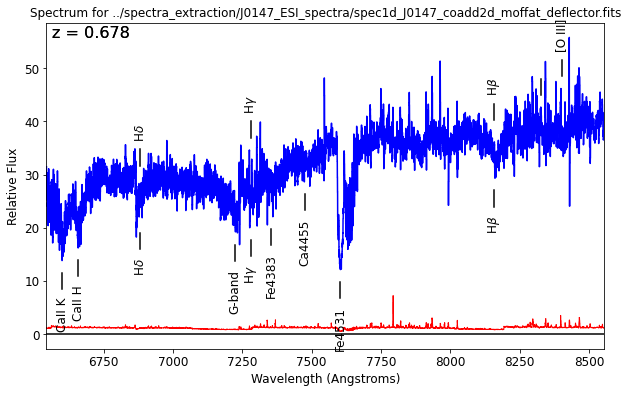

In [4]:
#%matplotlib notebook
fg = plt.figure(figsize=(10,6))
spec.smooth(3, fig=fg)
spec.mark_lines('abs', z=0.678, usesmooth=True)
spec.mark_lines('em', z=0.678, usesmooth=True)


The wavelength is red shifted.
Externally calculated velocity scale = 11.389911 km/s
velocity scale from ppxf = 11.389931 km/s


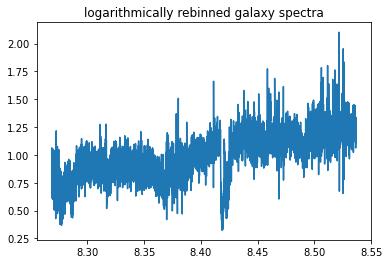

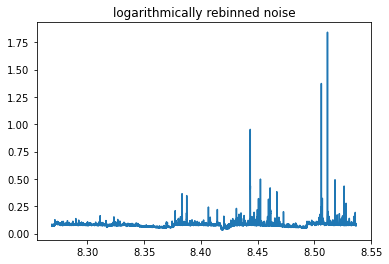

In [5]:
spec.cal_parm(z=0.678, high_z=True, logscale=True, veldis_start=200, noise_scale=0.08)

In [6]:
temp_spec = spec.gen_rebinned_temp(lib_path='../TEXT/*', sig_ins=1.3)


'sig_ins' is red shifted.

As no 'fwhm_temp' value is provided, FWHM for the Indo-US template library will be used as default value
vsyst = -35451.136083 

sigma_diff : 1.302871


In [45]:
mask_reg = np.log(np.array([[6860, 6930], [7570, 7700],  [8449, 8470]])/1.678) 
mask_reg 
#[6468, 6530],[7272, 7320], [8600, 8660],[7544, 7548], [7313, 7317], [7926, 7938],
#[7962, 7967], [7990, 7996], [7911, 7916], , [8293, 8300], [8340, 8346], [8426, 8432]

array([[8.31586011, 8.32601248],
       [8.41434574, 8.431373  ],
       [8.52420076, 8.52668318]])


degree : 4
 Best Fit:       Vel     sigma
 comp.  0:       130       337
chi2/DOF: 1.541; degree = 4; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  18 / 1267

degree : 5
 Best Fit:       Vel     sigma
 comp.  0:       130       329
chi2/DOF: 1.540; degree = 5; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  16 / 1267

degree : 6
 Best Fit:       Vel     sigma
 comp.  0:       130       331
chi2/DOF: 1.540; degree = 6; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  17 / 1267

degree : 7
 Best Fit:       Vel     sigma
 comp.  0:       128       304
chi2/DOF: 1.535; degree = 7; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  17 / 1267

degree : 8
 Best Fit:       Vel     sigma
 comp.  0:       

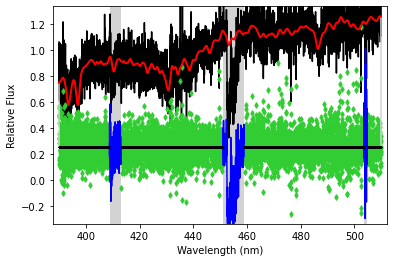

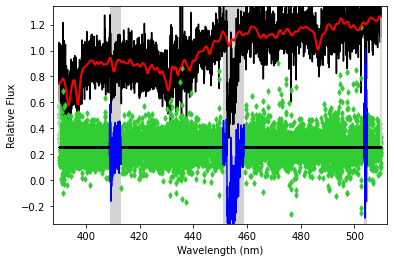

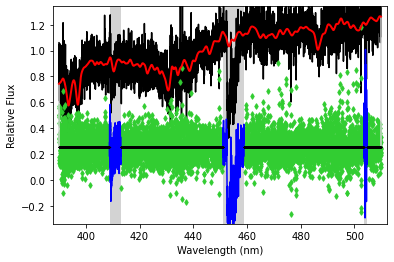

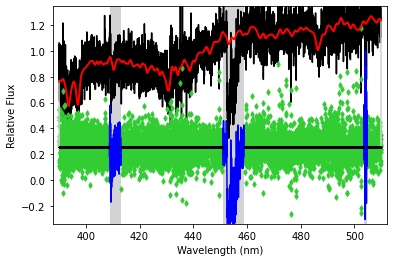

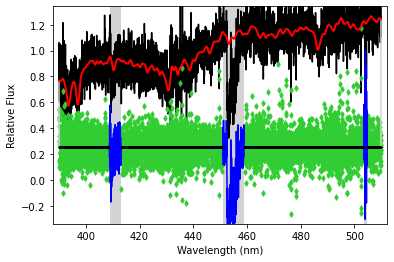

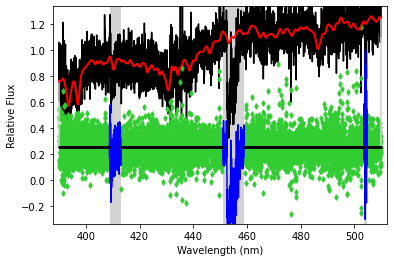

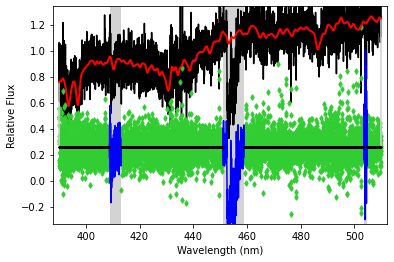

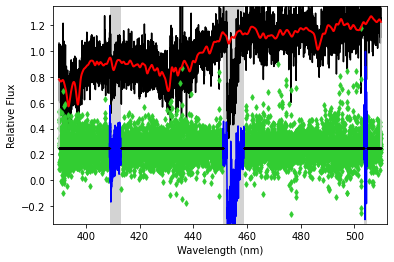

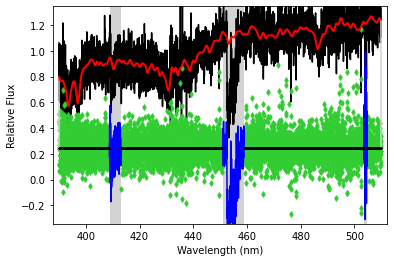

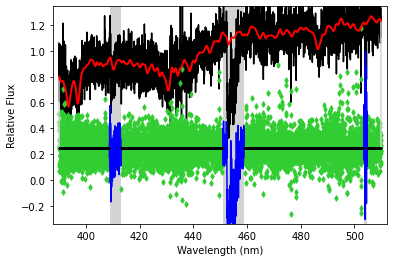

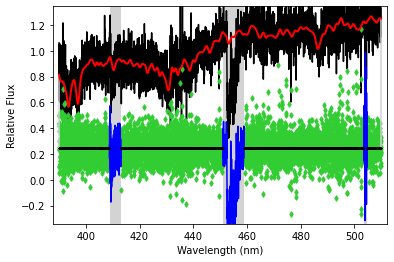

<Figure size 432x288 with 0 Axes>

In [46]:
spec.cal_veldis(temp_spec=temp_spec, degree=[4, 15], mask_reg=mask_reg, show_weight=True, moments=2)

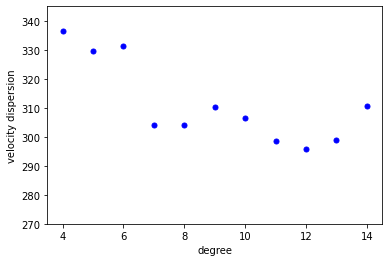

In [51]:
spec.plot_veldis(ylim=[270, 345])

order : 7


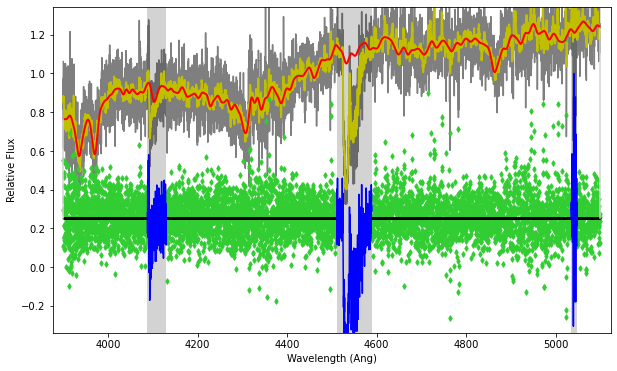

In [52]:
ord_list = np.array([7])

for od in ord_list:
    fg = plt.figure(figsize=(10,6))
    spec.plot_fit(order=od, boxsize=11, fig=fg)
    print('order : %d' %od)
    plt.show()

## Blue side

In [9]:
spec_b = Veldis('../spectra_extraction/J0147_ESI_spectra/spec1d_J0147_coadd2d_moffat_deflector.fits', 
              informat='fits', logwav=True, trimsec=[7600, 11350])#[7000, -3500]


Reading spectrum from ../spectra_extraction/J0147_ESI_spectra/spec1d_J0147_coadd2d_moffat_deflector.fits
Expected file format: fits
 Spectrum Start:  6544.12
 Spectrum End:     7545.88
 Dispersion (1st pixel):   0.25
 Dispersion (average):      0.27




Line        lambda_rest  lambda_obs
----------  -----------  -----------
CaII K        3933.67       6600.70
CaII H        3968.47       6659.09
H-delta       4101.00       6881.48
G-band        4305.00       7223.79
H-gamma       4340.00       7282.52
Fe4383        4383.00       7354.67
Ca4455        4455.00       7475.49


Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-delta       4101.00       6881.48
H-gamma       4340.00       7282.52



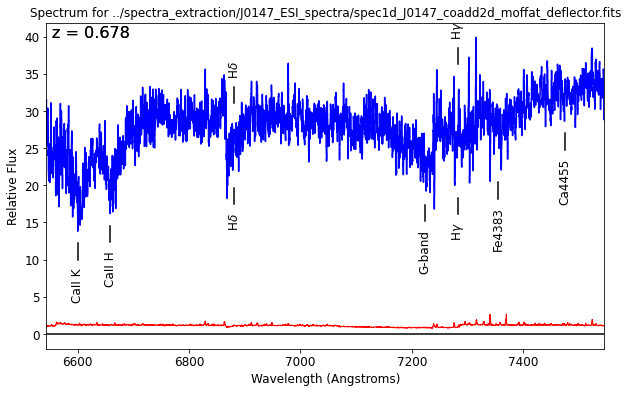

In [10]:
fg = plt.figure(figsize=(10,6))
spec_b.smooth(3, fig=fg)
spec_b.mark_lines('abs', z=0.678, usesmooth=True)
spec_b.mark_lines('em', z=0.678, usesmooth=True)


The wavelength is red shifted.
Externally calculated velocity scale = 11.389911 km/s
velocity scale from ppxf = 11.389921 km/s


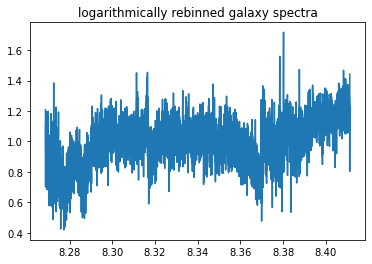

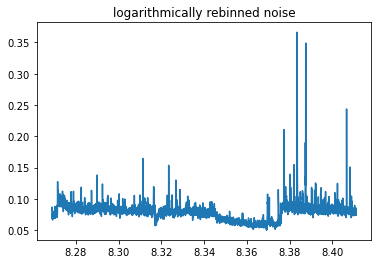

In [16]:
spec_b.cal_parm(z=0.678, high_z=True, logscale=True, veldis_start=200, noise_scale=0.08)

In [18]:
temp_spec_b = spec_b.gen_rebinned_temp(lib_path='../TEXT/*', sig_ins=1.3)


'sig_ins' is red shifted.

As no 'fwhm_temp' value is provided, FWHM for the Indo-US template library will be used as default value
vsyst = -35451.136083 

sigma_diff : 1.302871



degree : 2
 Best Fit:       Vel     sigma
 comp.  0:       120       299
chi2/DOF: 2.032; degree = 2; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  11 / 1267

degree : 3
 Best Fit:       Vel     sigma
 comp.  0:       120       298
chi2/DOF: 2.032; degree = 3; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  10 / 1267

degree : 4
 Best Fit:       Vel     sigma
 comp.  0:       120       299
chi2/DOF: 2.032; degree = 4; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  13 / 1267

degree : 5
 Best Fit:       Vel     sigma
 comp.  0:       109       281
chi2/DOF: 2.023; degree = 5; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 17; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  13 / 1267

degree : 6
 Best Fit:       Vel     sigma
 comp.  0:       

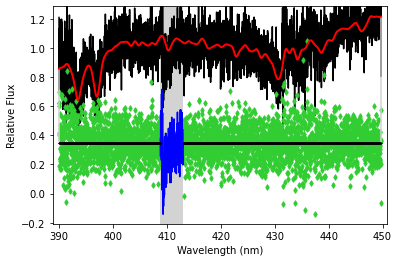

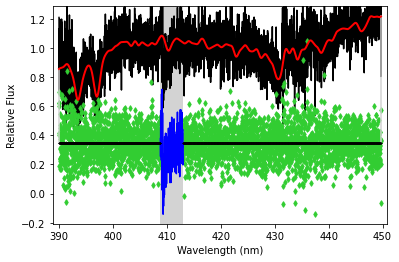

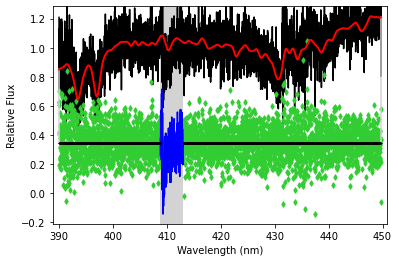

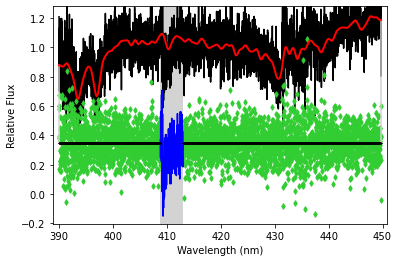

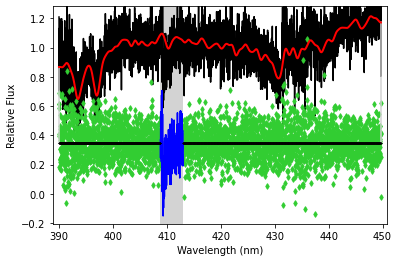

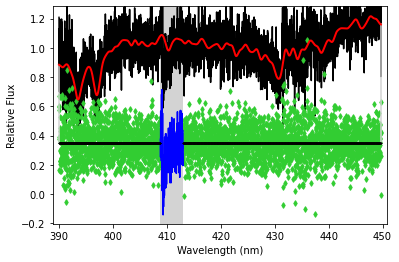

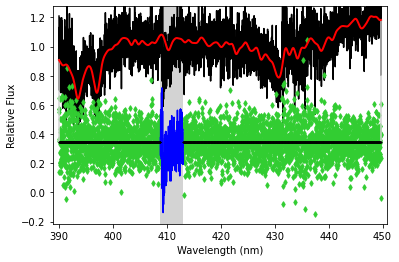

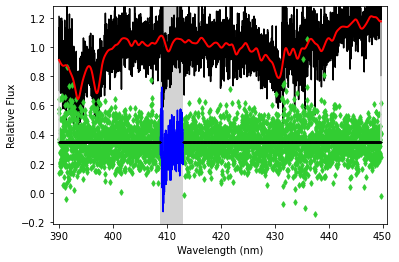

<Figure size 432x288 with 0 Axes>

In [63]:
spec_b.cal_veldis(temp_spec=temp_spec_b, degree=[2, 10], mask_reg=mask_reg, show_weight=True, moments=2)

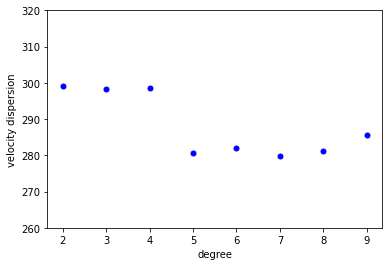

In [64]:
spec_b.plot_veldis(ylim=[260, 320])

order : 6


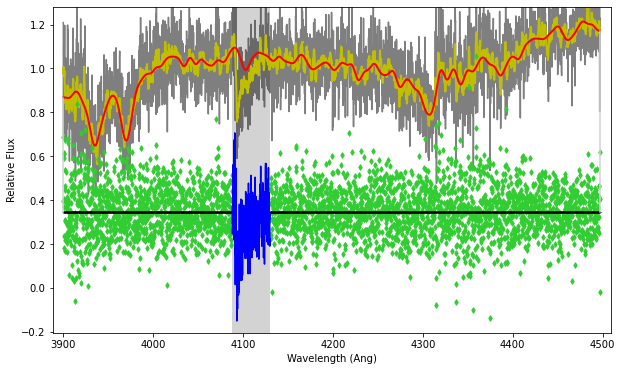

In [65]:
ord_list = np.array([6])

for od in ord_list:
    fg = plt.figure(figsize=(10,6))
    spec_b.plot_fit(order=od, boxsize=11, fig=fg)
    print('order : %d' %od)
    plt.show()

## Red side

In [11]:
spec_r = Veldis('../spectra_extraction/J0147_ESI_spectra/spec1d_J0147_coadd2d_moffat_deflector.fits', 
              informat='fits', logwav=True, trimsec=[10900, -4300])#[7000, -3500]


Reading spectrum from ../spectra_extraction/J0147_ESI_spectra/spec1d_J0147_coadd2d_moffat_deflector.fits
Expected file format: fits
 Spectrum Start:  7418.25
 Spectrum End:     8556.09
 Dispersion (1st pixel):   0.28
 Dispersion (average):      0.30




Line        lambda_rest  lambda_obs
----------  -----------  -----------
Ca4455        4455.00       7475.49
Fe4531        4531.00       7603.02
H-beta        4861.00       8156.76


Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-beta        4861.00       8156.76
[O III]       4962.00       8326.24
[O III]       5007.00       8401.75



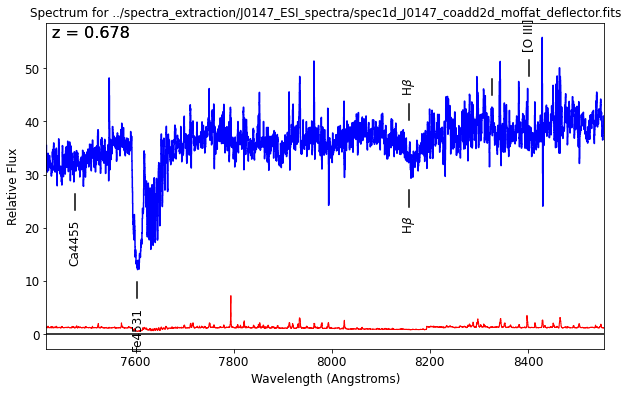

In [12]:
fg = plt.figure(figsize=(10,6))
spec_r.smooth(3, fig=fg)
spec_r.mark_lines('abs', z=0.678, usesmooth=True)
spec_r.mark_lines('em', z=0.678, usesmooth=True)


The wavelength is red shifted.
Externally calculated velocity scale = 11.389911 km/s
velocity scale from ppxf = 11.389921 km/s


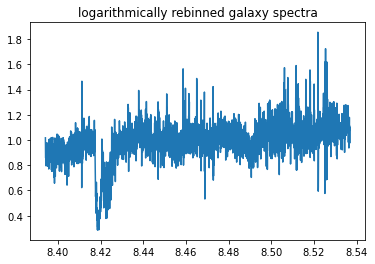

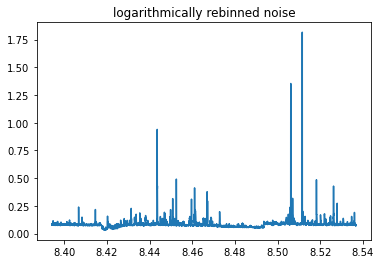

In [17]:
spec_r.cal_parm(z=0.678, high_z=True, logscale=True, veldis_start=200, noise_scale=0.08)

In [19]:
temp_spec_r = spec_r.gen_rebinned_temp(lib_path='../TEXT/*', sig_ins=1.3)


'sig_ins' is red shifted.

As no 'fwhm_temp' value is provided, FWHM for the Indo-US template library will be used as default value
vsyst = -73037.842842 

sigma_diff : 1.302871



degree : 2
 Best Fit:       Vel     sigma
 comp.  0:       112       319
chi2/DOF: 1.116; degree = 2; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  14 / 1267

degree : 3
 Best Fit:       Vel     sigma
 comp.  0:       112       320
chi2/DOF: 1.116; degree = 3; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  15 / 1267

degree : 4
 Best Fit:       Vel     sigma
 comp.  0:       112       322
chi2/DOF: 1.116; degree = 4; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  14 / 1267

degree : 5
 Best Fit:       Vel     sigma
 comp.  0:       109       325
chi2/DOF: 1.116; degree = 5; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  17 / 1267

degree : 6
 Best Fit:       Vel     sigma
 comp.  0:       

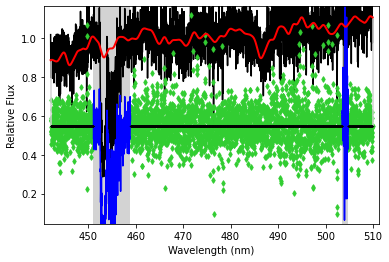

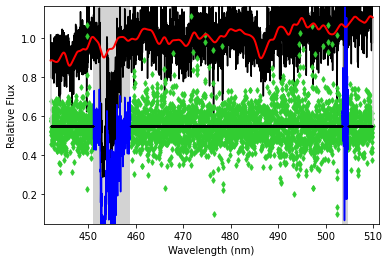

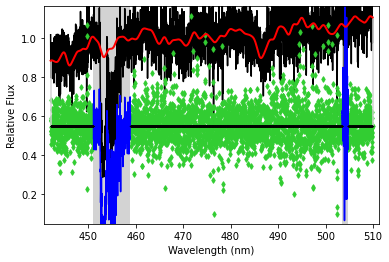

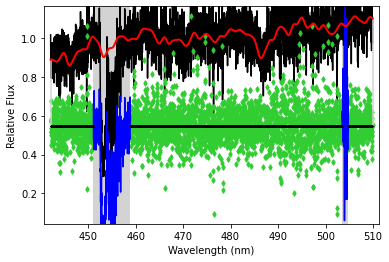

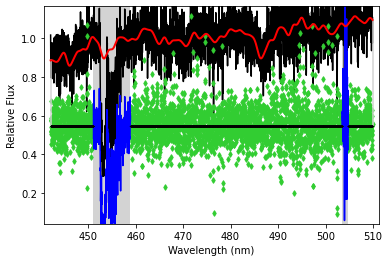

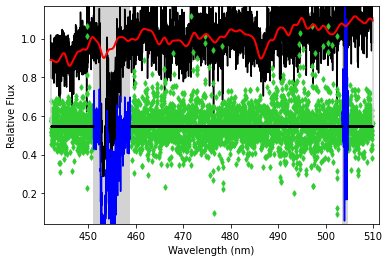

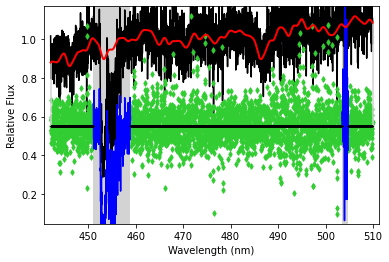

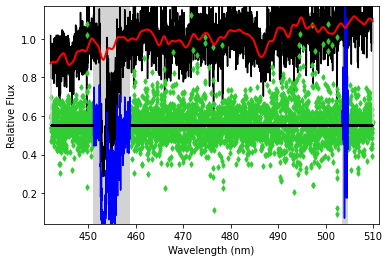

<Figure size 432x288 with 0 Axes>

In [66]:
spec_r.cal_veldis(temp_spec=temp_spec_r, degree=[2, 10], mask_reg=mask_reg, show_weight=True, moments=2)

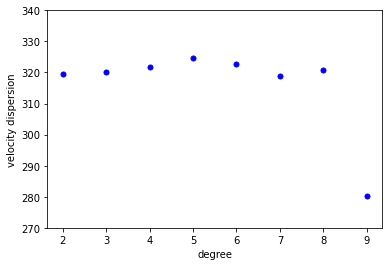

In [67]:
spec_r.plot_veldis(ylim=[270, 340])

order : 6


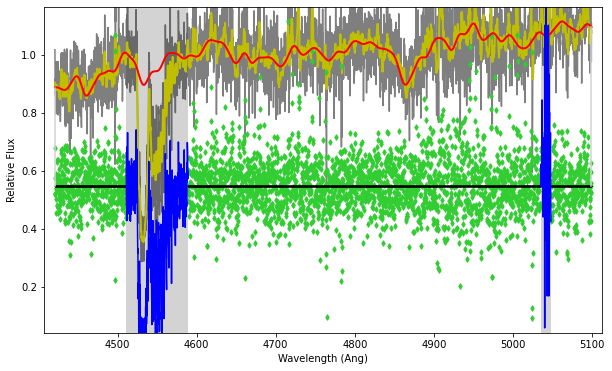

In [68]:
ord_list = np.array([6])

for od in ord_list:
    fg = plt.figure(figsize=(10,6))
    spec_r.plot_fit(order=od, boxsize=11, fig=fg)
    print('order : %d' %od)
    plt.show()

# Results

## Systematic uncertainty
###  Systematic uncertainty is calculated by changing wavelength range used to fit for velocity dispersion, degree of additive polynomial and template set. There are three choice for wavelength range- full spectrum, blue side  and red side.

In [69]:
veldis_array = []
discard_veldis = []

In [70]:
## full spectrum

addtive_deg_full = np.arange(6, 14)

for d in addtive_deg_full:
    for i in range(13):
        temp_choice = np.random.choice(temp_spec.shape[1], size=600, replace=False)
        spec.cal_veldis(temp_spec=temp_spec[:, temp_choice], degree=[d, d+1], mask_reg=mask_reg, 
                        show_weight=True, moments=2, plot=False, quiet=True)
        if np.sum(np.array(spec.temp_weight[0]) > 10) > 0:
            discard_veldis.append(spec.vel_dis[0])
        else:
            veldis_array.append(spec.vel_dis[0])
            
print(len(veldis_array), len(discard_veldis))


degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 9

degree : 9

degree : 9

degree : 9

degree : 9

degree : 9

degree : 9

degree : 9

degree : 9

degree : 9

degree : 9

degree : 9

degree : 9

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 11

degree : 11

degree : 11

degree : 11

degree : 11

degree : 11

degree : 11

degree : 11

degree : 11

degree : 11

degree : 11

degree : 11

degree : 11

degree : 12

degree : 12

degree : 12

In [71]:
## blue side
addtive_deg_b = np.arange(2, 10)

for d in addtive_deg_b:
    for i in range(13):
        temp_choice = np.random.choice(temp_spec_b.shape[1], size=600, replace=False)
        spec_b.cal_veldis(temp_spec=temp_spec_b[:, temp_choice], degree=[d, d+1], mask_reg=mask_reg, 
                        show_weight=True, moments=2, plot=False, quiet=True)
        if np.sum(np.array(spec_b.temp_weight[0]) > 10) > 0:
            discard_veldis.append(spec_b.vel_dis[0])
        else:
            veldis_array.append(spec_b.vel_dis[0])
            
print(len(veldis_array), len(discard_veldis))


degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

deg

In [72]:
## red side
addtive_deg_r = np.arange(2, 10)

for d in addtive_deg_r:
    for i in range(13):
        temp_choice = np.random.choice(temp_spec_r.shape[1], size=600, replace=False)
        spec_r.cal_veldis(temp_spec=temp_spec_r[:, temp_choice], degree=[d, d+1], mask_reg=mask_reg, 
                        show_weight=True, moments=2, plot=False, quiet=True)
        if np.sum(np.array(spec_r.temp_weight[0]) > 10) > 0:
            discard_veldis.append(spec_r.vel_dis[0])
        else:
            veldis_array.append(spec_r.vel_dis[0])
            
print(len(veldis_array), len(discard_veldis))


degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

deg

(array([ 2.,  8., 21., 27.,  7.,  1.,  5., 11., 20., 34., 18., 17., 11.,
         9.,  1.,  6., 14., 10., 19., 25., 18., 11.,  8.,  7.,  2.]),
 array([268.05022585, 271.40082992, 274.75143399, 278.10203806,
        281.45264213, 284.8032462 , 288.15385027, 291.50445434,
        294.85505841, 298.20566248, 301.55626655, 304.90687062,
        308.25747469, 311.60807876, 314.95868282, 318.30928689,
        321.65989096, 325.01049503, 328.3610991 , 331.71170317,
        335.06230724, 338.41291131, 341.76351538, 345.11411945,
        348.46472352, 351.81532759]),
 <BarContainer object of 25 artists>)

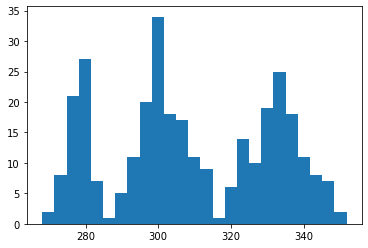

In [73]:
plt.hist(veldis_array, bins=25)

In [74]:
np.savetxt('J0147_systematic_veldis.txt', np.array(veldis_array), fmt='%f')

### Measured systematic uncertainty

In [75]:
print('systematic uncertainty for population : %d km/s' % int(np.std(veldis_array)))
print('systematic uncertainty for sample : %d km/s' % int(np.std(veldis_array, ddof=1)))

systematic uncertainty for population : 22 km/s
systematic uncertainty for sample : 22 km/s


In [76]:
print('mean velocity dispersion : %d km/s' % int(np.mean(veldis_array)))

mean velocity dispersion : 308 km/s


## The velocity dispersion value that to be reported is measured using all templates and additive polynomial with degree 8. The degree of the polynomial is decided based on the length of the spectrum which in this case around 2000Ang.


degree : 8
 Best Fit:       Vel     sigma
 comp.  0:       131       304
chi2/DOF: 1.535; degree = 8; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  15 / 1267


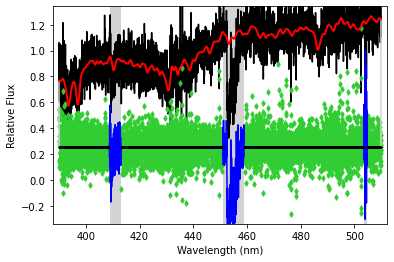

<Figure size 432x288 with 0 Axes>

In [82]:
spec.cal_veldis(temp_spec=temp_spec, degree=[8, 9], mask_reg=mask_reg, show_weight=True, moments=2)

In [83]:
spec.cal_sis_veldis(1.63, 0.678, 2.377)


velocity dispersion assuming SIS mass profile is 314.833838


<Quantity 314.83383792>

## store best fit data and good pixel values for future use

In [84]:
gdpix = np.pad(spec.goodpixels[0], (0, len(spec.best_fit[0])- len(spec.goodpixels[0])))
np.savetxt('J0147_bestfit_veldis.txt', np.array([spec.best_fit[0], gdpix]), fmt='%f')

In [85]:
fit_data = np.loadtxt('J0147_bestfit_veldis.txt')

6859.800728568582 6930.004234797648
7569.714501400011 7700.24423028545
8448.84805925884 8470.06025774523


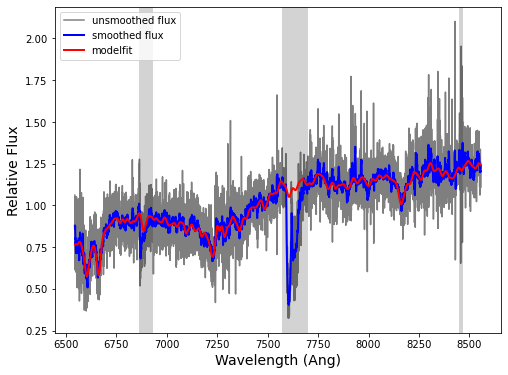

In [86]:
plt.figure(figsize=(8,6))
boxsize=15
x = np.exp(spec.wav_rebinned)*1.678
ll, rr = np.min(x), np.max(x)
gal_rebinn = spec1d.Spec1d(wav=x, flux=spec.flux_rebinned, verbose=False)
gal_smooth, varsmooth = gal_rebinn.smooth_boxcar(boxsize, verbose=False)
bst = fit_data[0] #spec.best_fit[0]
goodpixels = np.trim_zeros(fit_data[1], 'b').astype('int')#spec.goodpixels[0]
plt.xlabel(r"Wavelength (Ang)", fontsize=14)
plt.ylabel("Relative Flux", fontsize=14)
plt.plot(x, gal_rebinn['flux'], color='k', label='unsmoothed flux', alpha=0.5)
plt.plot(x, gal_smooth, color='b', linewidth=2, label='smoothed flux')
plt.plot(x, bst, 'r', linewidth=2, label='modelfit')
w = np.flatnonzero(np.diff(goodpixels) > 1)
for wj in w:
    a, b = goodpixels[wj : wj + 2]
    print(x[a], x[b])
    plt.axvspan(x[a], x[b], facecolor='lightgray')
    #plt.plot(x[a : b + 1], resid[a : b + 1], 'b')
    
# If the span is two thin than the function doesn't plot it visbly. So increased the span manually.
#plt.axvspan(5570, 5580, facecolor='lightgray')
plt.legend()

## Check what is velocity dispersion if the rest wavelength region from 4200-4800 Ang and 5090-5450 Ang are used as Matt suggested.

In [87]:
spec_new = Veldis('../spectra_extraction/J0147_ESI_spectra/spec1d_J0147_coadd2d_moffat_deflector.fits', 
              informat='fits', logwav=True)


Reading spectrum from ../spectra_extraction/J0147_ESI_spectra/spec1d_J0147_coadd2d_moffat_deflector.fits
Expected file format: fits
 Spectrum Start:  4902.88
 Spectrum End:    10074.55
 Dispersion (1st pixel):   0.19
 Dispersion (average):      0.27



In [88]:
spec_new.closest_wavelength(np.array([[4200, 4800], [5090, 5450]])*1.678)


Given waverange(assumed) : 

7047.599999999999 8054.4
8541.02 9145.1

Closest waverange to the given ones : 

7047.628449009394 8054.535500259592
8541.152969124452 9144.995581990157


([(7047.628449009394, 8054.535500259592),
  (8541.152969124452, 9144.995581990157)],
 [(9551, 13066), (14610, 16408)])

In [89]:
spec1 = Veldis('../spectra_extraction/J0147_ESI_spectra/spec1d_J0147_coadd2d_moffat_deflector.fits', 
              informat='fits', logwav=True, trimsec=[9550, 13070])


Reading spectrum from ../spectra_extraction/J0147_ESI_spectra/spec1d_J0147_coadd2d_moffat_deflector.fits
Expected file format: fits
 Spectrum Start:  7047.36
 Spectrum End:     8055.45
 Dispersion (1st pixel):   0.27
 Dispersion (average):      0.29




Line        lambda_rest  lambda_obs
----------  -----------  -----------
G-band        4305.00       7223.79
H-gamma       4340.00       7282.52
Fe4383        4383.00       7354.67
Ca4455        4455.00       7475.49
Fe4531        4531.00       7603.02



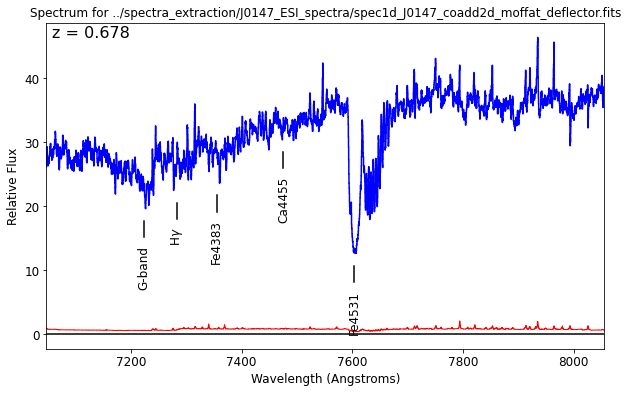

In [90]:
fg = plt.figure(figsize=(10,6))
spec1.smooth(7, fig=fg)
spec1.mark_lines('abs', z=0.678, usesmooth=True)


The wavelength is red shifted.
Externally calculated velocity scale = 11.389911 km/s
velocity scale from ppxf = 11.389921 km/s


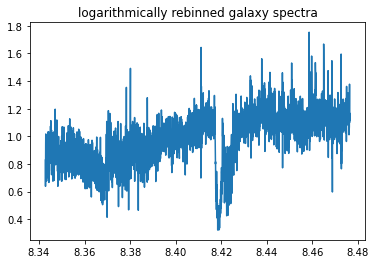

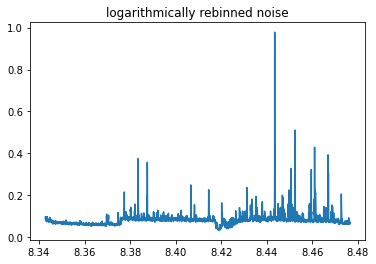

In [91]:
spec1.cal_parm(z=0.678, high_z=True, logscale=True, veldis_start=200, noise_scale=0.08)

In [92]:
temp_spec1 = spec1.gen_rebinned_temp(lib_path='../TEXT/*', sig_ins=1.3)


'sig_ins' is red shifted.

As no 'fwhm_temp' value is provided, FWHM for the Indo-US template library will be used as default value
vsyst = -57661.462804 

sigma_diff : 1.302871



degree : 2
 Best Fit:       Vel     sigma
 comp.  0:       101       324
chi2/DOF: 1.453; degree = 2; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  14 / 1267

degree : 3
 Best Fit:       Vel     sigma
 comp.  0:        88       302
chi2/DOF: 1.449; degree = 3; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  12 / 1267

degree : 4
 Best Fit:       Vel     sigma
 comp.  0:        78       291
chi2/DOF: 1.443; degree = 4; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  14 / 1267

degree : 5
 Best Fit:       Vel     sigma
 comp.  0:        76       273
chi2/DOF: 1.441; degree = 5; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  14 / 1267

degree : 6
 Best Fit:       Vel     sigma
 comp.  0:       

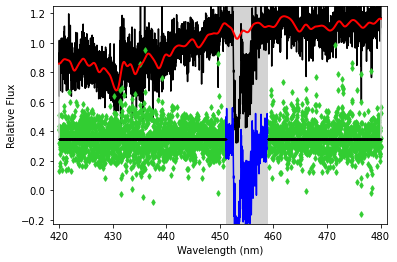

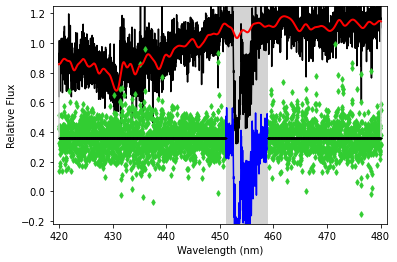

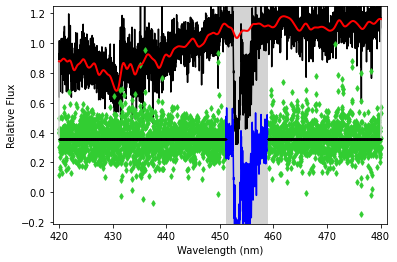

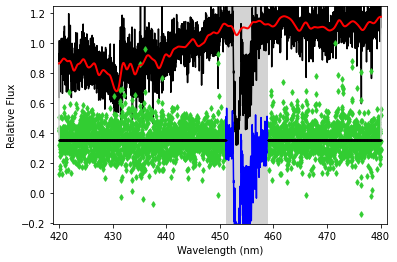

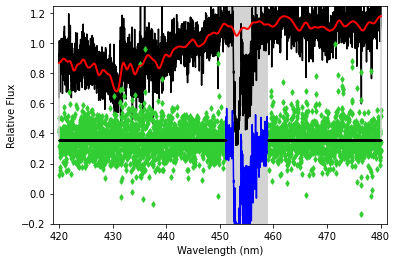

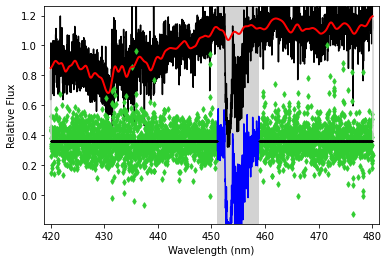

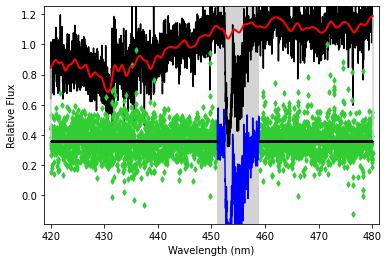

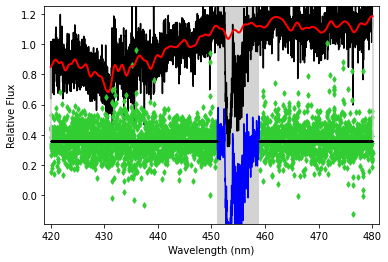

<Figure size 432x288 with 0 Axes>

In [93]:
spec1.cal_veldis(temp_spec=temp_spec1, degree=[2, 10], mask_reg=mask_reg, show_weight=True, moments=2)

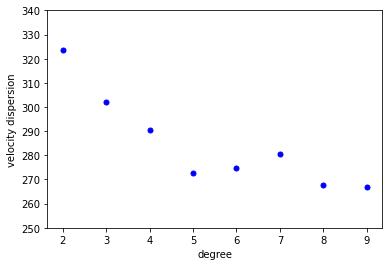

In [95]:
spec1.plot_veldis(ylim=[250, 340])

In [96]:
spec2 = Veldis('../spectra_extraction/J0147_ESI_spectra/spec1d_J0147_coadd2d_moffat_deflector.fits', 
              informat='fits', logwav=True, trimsec=[14610, 16410])


Reading spectrum from ../spectra_extraction/J0147_ESI_spectra/spec1d_J0147_coadd2d_moffat_deflector.fits
Expected file format: fits
 Spectrum Start:  8541.15
 Spectrum End:     9145.34
 Dispersion (1st pixel):   0.32
 Dispersion (average):      0.34




Line        lambda_rest  lambda_obs
----------  -----------  -----------
Mg I (b)      5176.00       8685.33



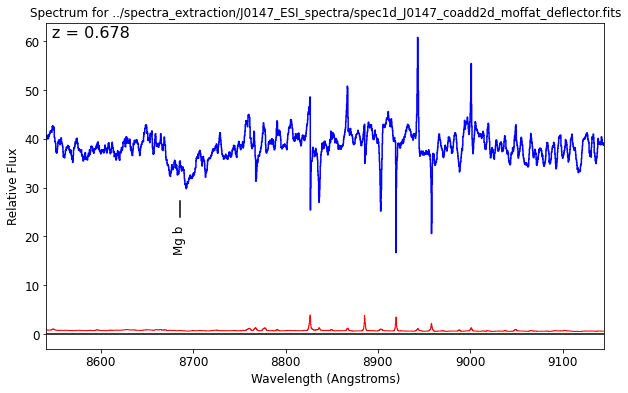

In [97]:
fg = plt.figure(figsize=(10,6))
spec2.smooth(7, fig=fg)
spec2.mark_lines('abs', z=0.678, usesmooth=True)

In [ ]:
spec2.cal_parm(z=0.678, high_z=True, logscale=True, veldis_start=200, noise_scale=0.08)

In [ ]:
temp_spec2 = spec2.gen_rebinned_temp(lib_path='../TEXT/*', sig_ins=1.3)

In [ ]:
spec2.cal_veldis(temp_spec=temp_spec2, degree=[2, 11], mask_reg=mask_reg, show_weight=True, moments=2)